# 手書き数字の認識

## データを知る

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits["data"].shape, digits["target"].shape

((1797, 64), (1797,))

### 実際どんなデータなのかを画像で確認

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

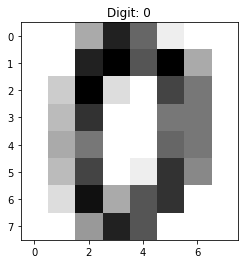

In [5]:
# 実際の「0」の画像を表示してみる
plt.imshow(digits["images"][0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Digit: 0')
plt.show()

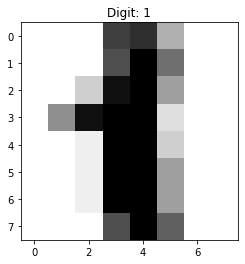

In [6]:
# 実際の「1」の画像を表示してみる
plt.imshow(digits["images"][1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Digit: 1')
plt.show()

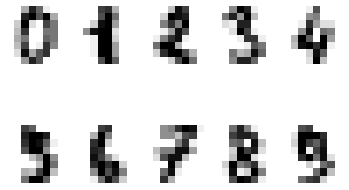

In [7]:
for label, image in zip(digits["target"][:10], digits["images"][:10]):
    plt.subplot(2, 5, label+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

## データを分割する

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits["data"],
    digits["target"],
    random_state=2
)

## 機械学習モデルを構築
- 今回はSupportVectorMachine(SVM)を適用
    - 現時点では手法は特にフォーカスしない    

In [9]:
from sklearn.svm import SVC

svm = SVC(C=1.0, gamma=0.001)

# 学習データを使って学習
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## モデルの評価
- テストデータを使って、構築した機械学習モデルの性能を評価する
    - テストデータ == 「モデル構築に利用していない」 かつ 「ラベルが既知」

In [10]:
svm.score(X_test, y_test)

0.98

## 試しに使ってみる
- 手書きの「4」を作ってみた

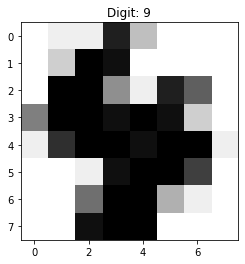

In [11]:
import numpy as np

tegaki_4 = np.array([0., 1., 1., 14., 4., 0., 0., 0., 0., 3., 16., 15., 0., 0., 0., 0., 0., 16., 16., 7., 1., 14., 10., 0., 8., 16., 16., 15., 16., 15.,
                     3., 0., 1., 13., 16., 16., 15., 16., 16., 1., 0., 0., 1., 15., 16., 16., 12., 0., 0., 0., 9., 16., 16., 5., 1., 0., 0., 0., 15., 16., 16., 0., 0., 0.])

plt.imshow(tegaki_4.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Digit: 9')
plt.show()

In [12]:
predict = svm.predict(tegaki_4.reshape(1, -1))

print(predict)  # [4] => 数字の4という判断をした

[4]
